## Replace Numbers With Names

In [1]:
import json
import re

# Load the mapping from the JSON file
with open("numbers.json", "r") as file:
    numbers_dict = json.load(file)

# Read the content of the text file
with open("/Users/georgevengrovski/Documents/PersonalProjects/imessage_analysis/Righties gc (gyatt chat) - 389.txt", "r") as file:
    content = file.readlines()

# Function to replace numbers with names in a line of text
def replace_numbers_with_names(line, numbers_dict):
    # Use regex to find all potential phone numbers in the line
    for number in re.findall(r'\+\d+', line):
        # Replace each found number with the corresponding name if it exists in the dictionary
        if number in numbers_dict:
            line = line.replace(number, numbers_dict[number])
    return line

# Replace numbers with names using the numbers_dict for each line in the content
updated_content = [replace_numbers_with_names(line, numbers_dict) for line in content]

# Save the updated content to a new file
with open("output.txt", "w") as file:
    file.writelines(updated_content)

## Generate Pandas Database

In [2]:
import pandas as pd
import re

def parse_text_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Split the content by double newlines to separate each block
    blocks = content.strip().split('\n\n')

    # Prepare lists to hold column data
    date_times = []
    read_latencies = []
    senders = []
    message_contents = []
    all_reactions = []

    # Regex to capture the date-time and read latency
    datetime_latency_regex = re.compile(r"^(.*?) \(Read by you after (.*)\)$")
    for i, block in enumerate(blocks):

        lines = block.split('\n')
        if not lines:
            continue

        # Extract date-time and read latency
        datetime_latency_match = datetime_latency_regex.match(lines[0])
        if datetime_latency_match:
            date_times.append(datetime_latency_match.group(1))
            read_latencies.append(datetime_latency_match.group(2))
        else:
            date_times.append('')
            read_latencies.append('')

        # Extract sender
        sender = lines[1] if len(lines) > 1 else ''
        senders.append(sender)

        remaining_block = lines[2:]

        # Extract message content and reactions
        message_content = []
        reaction_dict = {}

        for line in remaining_block:
            if line.startswith("Reactions:"):
                reaction_lines = remaining_block[remaining_block.index(line) + 1:]
                for reaction in reaction_lines:
                    try:
                        reaction_type, name = reaction.split(' by ')
                    except:
                        continue
                    if reaction_type not in reaction_dict:
                        reaction_dict[reaction_type] = []
                    reaction_dict[reaction_type].append(name)
                break
            else:
                message_content.append(line)

        message_contents.append(' '.join(message_content))
        all_reactions.append(reaction_dict)

    # Create DataFrame
    df = pd.DataFrame({
        'date-time': date_times,
        'read_latency': read_latencies,
        'sender': senders,
        'message_content': message_contents,
        'reactions': all_reactions
    })

    return df

# Example usage
file_path = 'output.txt'
df = parse_text_file(file_path)

# Save the DataFrame to a CSV file
df.to_csv('formatted_output.csv', index=False)

## Reactions Analysis!

### Most Raw Reactions Recieved:

In [3]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('formatted_output.csv')

# Initialize the dictionary to collect reactions
raw_reactions_received = {
    "Me": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Alec Matulka": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Gian Rodrigues": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Ezana Girmay": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Jacob Guenther": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Josh Lester": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Krithik Duraisamy": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Lamek Mekonen": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Mackey Guenther": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Themba Kimani": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Josh Paul": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0}
}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Convert the string representation of dictionary to actual dictionary
    reactions_dict = eval(row['reactions'])
    
    # Update the reaction counts for the sender
    sender = row['sender']
    if sender in raw_reactions_received:
        raw_reactions_received[sender]["total_messages_sent"] += 1
        for reaction_type, names in reactions_dict.items():
            if reaction_type in raw_reactions_received[sender]:
                raw_reactions_received[sender][reaction_type] += len(names)


raw_reactions_received['George Vengrovski'] = raw_reactions_received['Me']
del raw_reactions_received['Me']

# Example to see the output
print(raw_reactions_received)

{'Alec Matulka': {'Emphasized': 294, 'Disliked': 86, 'Loved': 254, 'Questioned': 2, 'Laughed': 2021, 'total_messages_sent': 2200}, 'Gian Rodrigues': {'Emphasized': 1006, 'Disliked': 170, 'Loved': 452, 'Questioned': 25, 'Laughed': 3218, 'total_messages_sent': 10652}, 'Ezana Girmay': {'Emphasized': 138, 'Disliked': 60, 'Loved': 73, 'Questioned': 4, 'Laughed': 819, 'total_messages_sent': 1073}, 'Jacob Guenther': {'Emphasized': 254, 'Disliked': 27, 'Loved': 187, 'Questioned': 6, 'Laughed': 859, 'total_messages_sent': 2139}, 'Josh Lester': {'Emphasized': 338, 'Disliked': 41, 'Loved': 260, 'Questioned': 2, 'Laughed': 1264, 'total_messages_sent': 3298}, 'Krithik Duraisamy': {'Emphasized': 41, 'Disliked': 8, 'Loved': 27, 'Questioned': 1, 'Laughed': 324, 'total_messages_sent': 340}, 'Lamek Mekonen': {'Emphasized': 460, 'Disliked': 108, 'Loved': 229, 'Questioned': 19, 'Laughed': 1610, 'total_messages_sent': 5217}, 'Mackey Guenther': {'Emphasized': 654, 'Disliked': 172, 'Loved': 379, 'Questioned'

### Analysis of HaHas

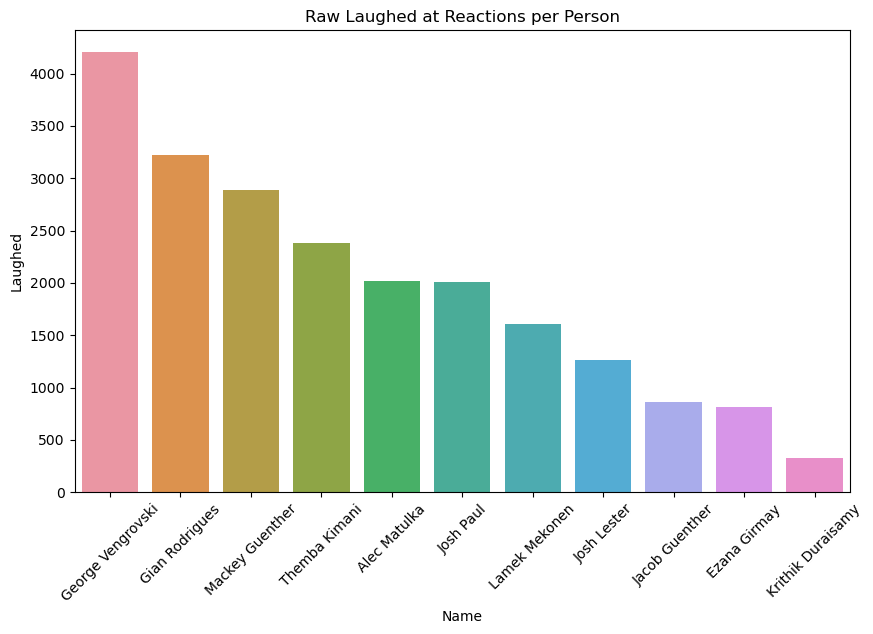

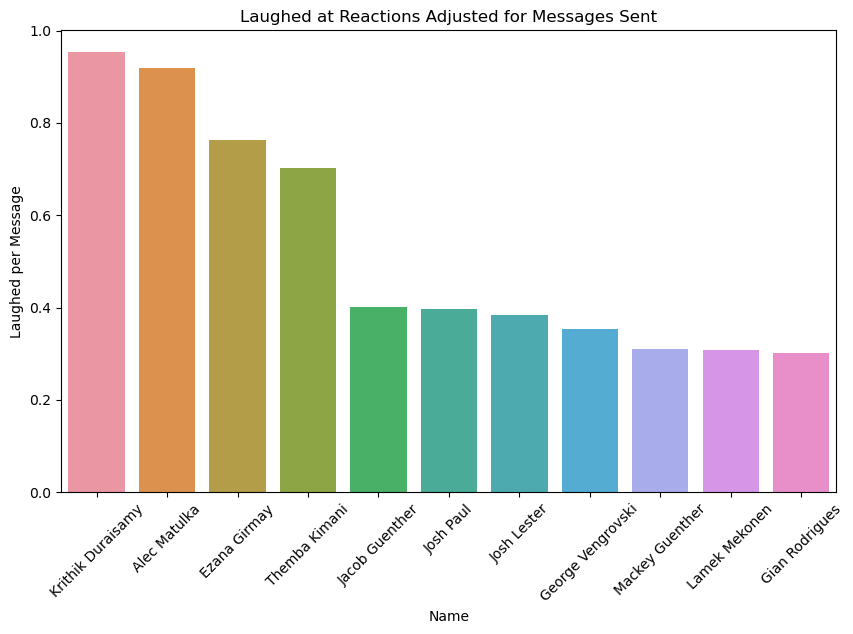

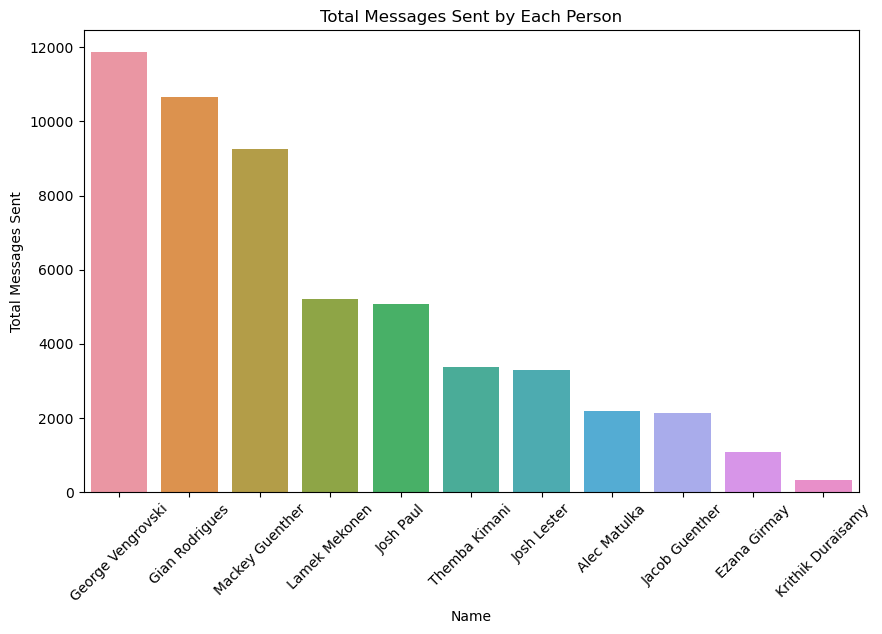

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Laughed at reactions per person
plt.figure(figsize=(10, 6))
df_sorted_laughed = df_reactions.sort_values('Laughed', ascending=False)
sns.barplot(data=df_sorted_laughed, x='Name', y='Laughed')
plt.title('Raw Laughed at Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Laughed at reactions adjusted for messages sent
df_reactions['Laughed per Message'] = df_reactions['Laughed'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_laughed_per_message = df_reactions.sort_values('Laughed per Message', ascending=False)
sns.barplot(data=df_sorted_laughed_per_message, x='Name', y='Laughed per Message')
plt.title('Laughed at Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

# Plot for total messages sent
plt.figure(figsize=(10, 6))
df_sorted_total_messages = df_reactions.sort_values('Total Messages Sent', ascending=False)
sns.barplot(data=df_sorted_total_messages, x='Name', y='Total Messages Sent')
plt.title('Total Messages Sent by Each Person')
plt.xticks(rotation=45)
plt.show()

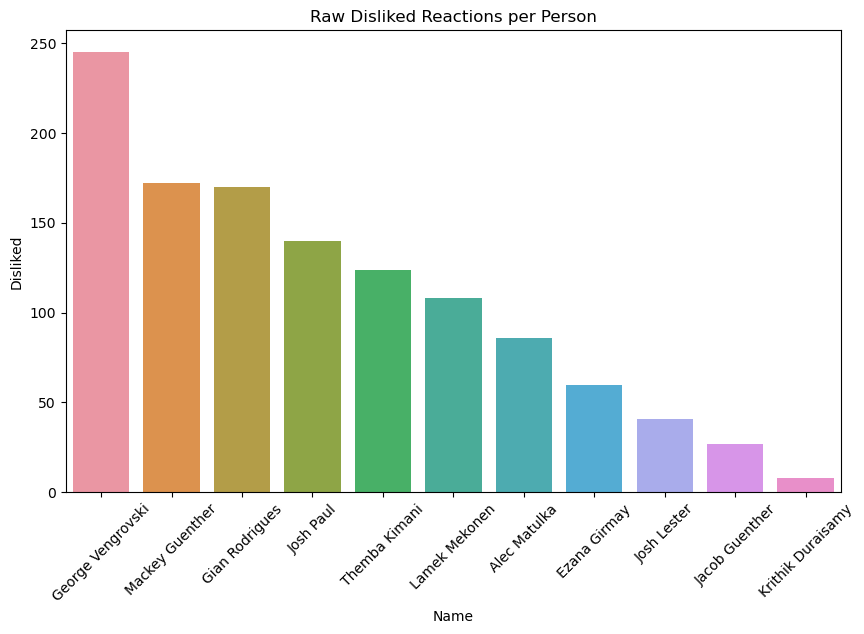

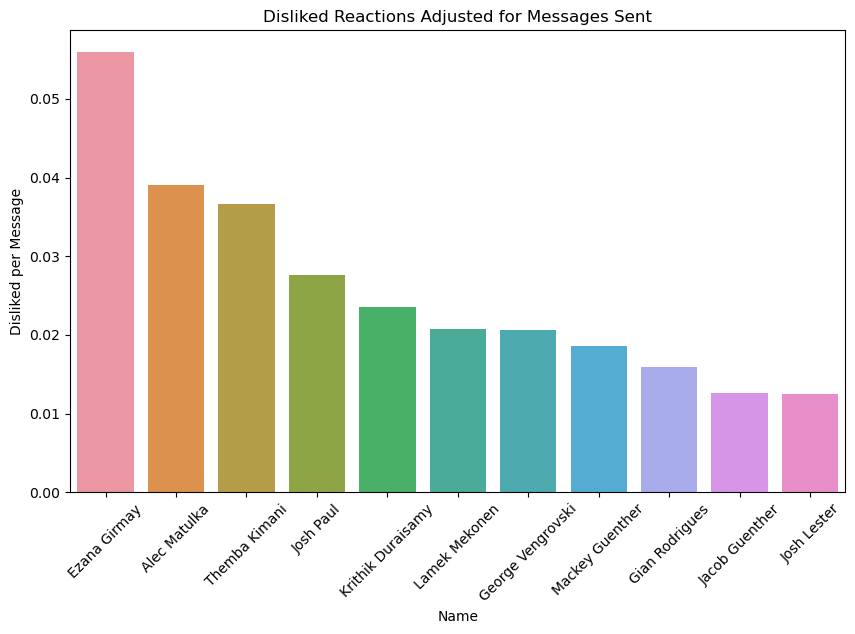

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Disliked reactions per person
plt.figure(figsize=(10, 6))
df_sorted_disliked = df_reactions.sort_values('Disliked', ascending=False)
sns.barplot(data=df_sorted_disliked, x='Name', y='Disliked')
plt.title('Raw Disliked Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Disliked reactions adjusted for messages sent
df_reactions['Disliked per Message'] = df_reactions['Disliked'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_disliked_per_message = df_reactions.sort_values('Disliked per Message', ascending=False)
sns.barplot(data=df_sorted_disliked_per_message, x='Name', y='Disliked per Message')
plt.title('Disliked Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

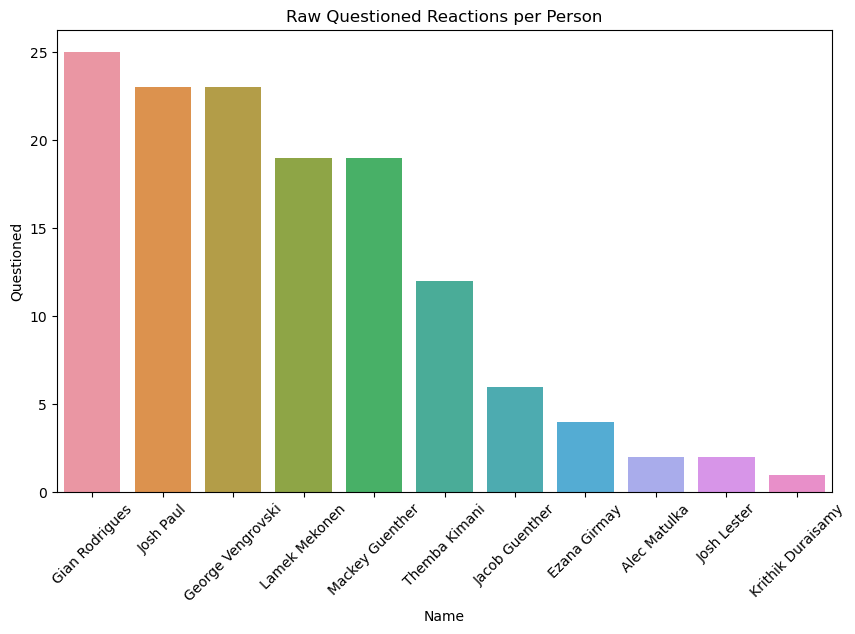

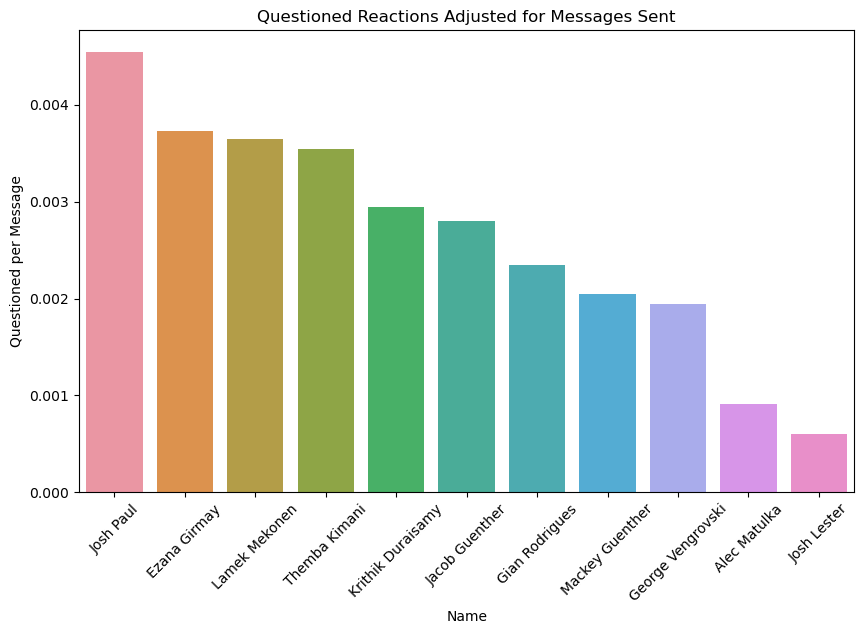

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Questioned reactions per person
plt.figure(figsize=(10, 6))
df_sorted_questioned = df_reactions.sort_values('Questioned', ascending=False)
sns.barplot(data=df_sorted_questioned, x='Name', y='Questioned')
plt.title('Raw Questioned Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Questioned reactions adjusted for messages sent
df_reactions['Questioned per Message'] = df_reactions['Questioned'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_questioned_per_message = df_reactions.sort_values('Questioned per Message', ascending=False)
sns.barplot(data=df_sorted_questioned_per_message, x='Name', y='Questioned per Message')
plt.title('Questioned Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

## Eleveners and Histograms!

In [7]:
# import pandas as pd

# # Load the data from CSV
# df = pd.read_csv('formatted_output.csv')

# # Initialize the dictionary to collect reactions
# raw_reactions_received = {
#     "Me": {},
#     "Alec Matulka": {},
#     "Gian Rodrigues": {},
#     "Ezana Girmay": {},
#     "Jacob Guenther": {},
#     "Josh Lester": {},
#     "Krithik Duraisamy": {},
#     "Lamek Mekonen": {},
#     "Mackey Guenther": {},
#     "Themba Kimani": {},
#     "Josh Paul": {}
# }

# # Iterate through each row in the DataFrame
# for index, row in df.iterrows():
#     # Convert the string representation of dictionary to actual dictionary
#     reactions_dict = eval(row['reactions'])
    
#     # Update the reaction counts for the sender
#     sender = row['sender']
#     if sender in raw_reactions_received:
#         raw_reactions_received[sender]["total_messages_sent"] += 1
#         num_reactions = 0 
#         for reaction_type, names in reactions_dict.items():
#             num_reactions += 1
#         raw_reactions_received[sender][num_reactions] += 1

# raw_reactions_received['George Vengrovski'] = raw_reactions_received['Me']
# del raw_reactions_received['Me']

# # Example to see the output
# print(raw_reactions_received)

## Giving and Recieving Haha's

## Interaction Graph